[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python/blob/main/8-gyakorlat.ipynb)

# Házi feladatok

##  `ToDo`

 1. Írjunk egy `ToDo` nevű osztályt, amiben a teendőinket tudjuk nyilvántartani. Egy teendőt, két dolog ír le:

    1.  Szöveges leírás: `str`

    2.  Határidő.

    Az egyedeket a `description` (szöveges leírás) és `deadline` (dátum)
    paraméterekkel inicializáljuk. A dátumot `iso` formátumban adjuk meg,
    azaz sztringként, aminek formátuma `YYYY-MM-DD`, azaz évszám négy
    karaktere, a hónap sorszáma (01-12), a nap sorszáma (01-31)

    Írjuk meg az `__str__` és `__repr__` metódusokat.

    Ha `obj` az osztályunk egy példánya, akkor a `str(obj)` adja vissza a
    `description` mező első legfeljebb 23 karakterét, amit a dátum követ
    `(év. hónap magyar neve nap sorszáma.-ig)` formában. Ha a leírás nem fér
    el, az adott szélességben, akkor az utolsó három karakter legyen `...`.

    pl.

        todo0 = ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")
        print(todo0)
        todo1 = ToDo("python hf", "2022-10-24")
        print(todo1)

    eredménye:

        El kell készítenem a... (2022. október 24.-ig)
        python hf (2022. október 24.-ig)

    A `__repr__` metódus az osztály nevét és az inicializáskor használt
    argumentumokat adja vissza a szokásos alakban, `repr(todo0)`
    
    ```
    ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")
    ```

    A dátumok kezelését nem kell önállóan elkészíteni, használhatjuk a
    `datetime` module `date` osztályát. Nézzük meg az `isoformat`,
    `fromisoformat`, `year`, `month`, `day` metódusokat.

    A magyar hónapneveket valószínűleg nekünk kell megadni!

    Szokás szerint írjunk teszt függvényt, ami az osztály metódusait
    ellenőrzi 3-4 teszteseten: hosszú leírás, rövid leírás, dátum helyes
    formátumban, dátum helytelen formátumban, leírás nem `str`, stb.

    Ha a dátum helytelen formátumban van vagy a description nem `str`, akkor
    az elvárt működés az, hogy `ValueError` hibát kapunk. Ennek
    teszteléséhez a `pytest` modulból a `raises` függvényt kell importálni
    és a teszt függvényben a

        with raises(ValueError):
            ToDo(...)

    sorokat elhelyezni, ahol a `...` helyén a hibát okozó argumentumok
    állnak.

    A típus annotáció, és a dokumentációs string most opcionális.


In [10]:
try:
    import ipytest
    ipytest.autoconfig()
    
except ModuleNotFoundError:
    print("Trying to install ipytest")
    ! pip install ipytest --quiet
    print("Try again!")

In [15]:
import datetime 

class ToDo:
    months = "január február március április május április június július augusztus szeptember október november december".split()
    def __init__(self, description, date):
        if not isinstance(description, str):
            raise ValueError
        self.description = description
        try:
            self.date = datetime.date.fromisoformat(date)     
        except TypeError:
            raise ValueError

    def __str__(self):
        if len(self.description)>23:
            desc = self.description[:20] + "..."
        else:
            desc = self.description
        

        return f"{desc} ({self.date.year}. {self.months[self.date.month]} {self.date.day}.-ig)"

    def __repr__(self):
        return f'{type(self).__name__}("{self.description}", "{self.date.isoformat()}")'


In [16]:
%%ipytest
from pytest import raises

def test_ToDo():

    
    todo = ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")
    assert str(todo) == "El kell készítenem a... (2022. október 24.-ig)"
    assert repr(todo) == 'ToDo("El kell készítenem a python gyakorlat házi feladatot", "2022-10-24")'
    
    todo = ToDo("python hf", "2022-10-24")
    assert str(todo) == "python hf (2022. október 24.-ig)"
    assert repr(todo) == 'ToDo("python hf", "2022-10-24")'
    
    with raises(ValueError):
        ToDo(12414, "2022-10-22")
    
    with raises(ValueError):
        ToDo("test", "2022-13-22")
    
    with raises(ValueError):
        ToDo("test", datetime.date.fromisoformat("2022-10-22"))
    

.                                                                                            [100%]
1 passed in 0.01s


## `Permutation`



2.  Írjunk egy `Permutation` osztályt. Permutáció alatt most egy
    $\left\{{0,\dots,n-1}\right\}\to\left\{{0,\dots,n-1}\right\}$ bijekciót
    értünk! Inicializáláskor a $\pi$ permutációt az
    $(\pi(0), \dots,\pi(n-1))$ rendezett $n$-sel adjuk meg.

    Írjuk meg az `__str__` és `__repr__` metódusokat. A `__str__` metódus a
    permutáció ciklus reprezentációját adja vissza a `cycles: ` szöveg után.

    A $\pi$ permutáció egy ciklusa alatt egy $c_0,\dots, c_{k-1}$ sorozatot
    értünk, ahol $\pi(c_t)=c_{t+1}$, ha $t+1<k$ és $\pi(c_{k-1})=c_0$. Ha a
    permutációt írányított gráfként ábrázoljuk ($i\to \pi(i)$ élekkel),
    akkor ezek a keletkező körök. A ciklusok az alaphalmazt ekvivalencia
    osztályokra bontják, a permutáció megadásához elgendő a ciklusokon belül
    feljegyezni a sorrendet. Sőt az egy hosszú ciklusokra nincs is szükség a
    leíráshoz. [További információért, lásd a Wikipédia
    bejegyzést!](https://en.wikipedia.org/wiki/Cycles_and_fixed_points)

    Minden egyes ciklust a legkisebb elemével kezdve írjunk fel, és a
    ciklusok sorrendjét is a legkisebb elemek sorrendje határozza meg. Nem
    kell túlbonyolítani a dolgot. Ha a ciklusokat már kiszámoltuk, akkor a
    ciklusokból álló lista rendezése pont ezt csinálja!

    Példák.

        (0, 1, 2, 3, 4, 5): ciklus reprezentáció = []
        (0, 1, 2, 3, 5, 4): ciklus reprezentáció = [(4,5)]
        (1, 2, 3, 4, 5, 0): ciklus reprezentáció = [(0, 1, 2, 3, 4, 5)]
        (1, 2, 0, 4, 5, 3): ciklus reprezentáció = [(0, 1, 2), (3, 4, 5)]

    A `__repr__` metódus a szokásos alakú, osztály név és az inicializáló
    argumentumok.

    Példák.

        pi0 = Permutation([1, 2, 3, 0])
        print(pi0)       # -> cycles : [(0, 1, 2, 3)]
        print(repr(pi0)) # -> Permutation((1, 2, 3, 0))
        pi1 = Permutation([1, 0, 3, 2])
        print(pi1)       # -> cycles : [(0, 1), (2, 3)]
        print(repr(pi1)) # -> Permutation((1, 0, 3, 2))

    Az `__init__` függvény ellenőrizze, hogy a kapott $n$-es valóban
    permutáció-e, ha nem akkor dobjon `ValueError` hibát! Ezt sem kell
    túlbonyolítani. Ötlet: egy véges függvény pontosan akkor permutáció, ha
    értékkészlete ugyanaz mint az értelmezési tartománya. Jelen esetben az
    értelemzési tartomány `set(range(n))`, ahol `n` a bemenetként kapott
    sorozat hossza!

    Szokás szerint írjunk teszt függvényt, ami az osztály metódusait
    ellenőrzi 4-5 teszteseten, amik között olyan is van amikor az argumentum
    hibás, azaz nem egy permutáció (nem sorozat, nem egészekből álló
    sorozat, ismétlődéseket tartalmazó sorozat, stb)!

    Ha az argumentum hibás akkor az elvárt működés az, hogy `ValueError`
    hibát kapunk. Ennek teszteléséhez a `pytest` modulból a `raises`
    függvényt kell importálni és a teszt függvényben a

        with raises(ValueError):
            Permutation(...)

    sorokat elhelyezni, ahol a `...` helyén a hibát okozó argumentumok
    állnak.

    A típus annotáció, és a dokumentációs string most opcionális.



In [7]:
class Permutation:

    def __init__(self, permutation):
        if set(permutation) != set(range(len(permutation))):
            raise ValueError
        self.permutation = tuple(permutation)    

    def __str__(self):
        cycles = []
        pi = list(self.permutation)
        for i in range(len(pi)):
            x = pi[i]
            if (x==-1) or (i==x):
                continue
            cycle = [i]
            while x!=i:
                cycle.append(x)
                pi[x], x = -1, p[x]
 
            cycles.append(tuple(cycle))

        return f"cycles : {cycles}"

    def __repr__(self):
        return f"{type(self).__name__}({self.permutation})"
    

Az `__str__` metódus implementálása során elő jött egy váratlan hiba gyakorlaton, amiről hirtelen nem láttam mi is történik. Az `while` ciklus elsp változata így nézett ki:
```
while x!=i:
    cycle.append(x)
    x, pi[x] = pi[x], -1
```
Ami aztán az `(0, 1, 2, 3, 5, 4)` permutációra alkalmazva végtelen ciklust eredményezett.

Mi volt itt a gond. Az értékadások sorrendje. A `python` értelmező először kiszámolta a jobb oldalt, eddig minden úgy történt ahogy várjuk. Aztán elkezdi az értékadást a bal oldalon. Elsőként `x` kap új értéket, majd az új `x` értékkel veszi `pi[x]`-et és emiatt a listának nem azt az elemét írja felül -1-gyel, amelyiket szerettük volna! 

In [5]:
pi = list(range(4, -1, -1))
x = 1
print(f"x={x}, pi={pi}")
x, pi[x] = pi[x], -1
print(f"x={x}, pi={pi}")

x=1, pi=[4, 3, 2, 1, 0]
x=3, pi=[4, 3, 2, -1, 0]


Ha itt a párok sorrendjét felcseréljük mindkét oldalon, akkor már a várt működést kapjuk

In [6]:
pi = list(range(4, -1, -1))
x = 1
print(f"x={x}, pi={pi}")
pi[x], x = -1, pi[x]
print(f"x={x}, pi={pi}")

x=1, pi=[4, 3, 2, 1, 0]
x=3, pi=[4, -1, 2, 1, 0]


In [11]:
%%ipytest

from pytest import raises

def test_Permutation():

    pi = Permutation((0, 1, 2, 3, 4, 5))
    assert str(pi) ==  "cycles : []" #: ciklus reprezentáció = []
    assert repr(pi) == "Permutation((0, 1, 2, 3, 4, 5))"
    
    pi = Permutation((0, 1, 2, 3, 5, 4))  # : ciklus reprezentáció = [(4,5)]
    assert str(pi) == "cycles : [(4, 5)]"
    assert repr(pi) == "Permutation((0, 1, 2, 3, 5, 4))"
        
    pi = Permutation((1, 2, 3, 4, 5, 0)) #: ciklus reprezentáció = [(0, 1, 2, 3, 4, 5)]
    assert str(pi) == "cycles : [(0, 1, 2, 3, 4, 5)]"
    assert repr(pi) == "Permutation((1, 2, 3, 4, 5, 0))"
    
    pi = Permutation((1, 2, 0, 4, 5, 3)) #: ciklus reprezentáció = [(0, 1, 2), (3, 4, 5)]
    assert str(pi) == "cycles : [(0, 1, 2), (3, 4, 5)]"
    assert repr(pi) == "Permutation((1, 2, 0, 4, 5, 3))"

    pi = Permutation((2, 0, 1))
    assert str(pi) == "cycles : [(0, 2, 1)]"
    assert repr(pi) == "Permutation((2, 0, 1))"
    
    with raises(ValueError):
        Permutation((1,1,1)) 
    
    with raises(ValueError):
        Permutation((0, 3))
    
    with raises(ValueError):
        Permutation("permutáció")
    

.                                                                                            [100%]
1 passed in 0.02s


## További tesztelési lehetőség

Készítsünk véletlen ciklus felbontást, és számítsuk ki a hozzá tartozó permutációt! A két függvényben 
`permutáció -> ciklus felbontás` és `ciklus felbontás -> permutáció` valószínűleg nem követjük el ugyanazt a hibát! 

In [14]:
import random
def cycle_to_perm(cycles, n):
    perm = list(range(n))
    for cycle in cycles:
        for x, y in zip(cycle, cycle[1:]):
            perm[x] = y 
        perm[cycle[-1]] = cycle[0]
    return perm

def random_cycles(n):
    ## not efficient in theory!
    points = list(range(n))
    cycles = []
    while points:
        i = points.pop(0)
        k = random.randint(0, len(points))
        if k>0:
            c = [i]
            for _ in range(k):
                j = random.randrange(len(points))
                c.append(points.pop(j))
            cycles.append(tuple(c))

    return cycles
        
def pop(lst, i, n):
    if i == n-1:
        return lst[i]
        
    value = lst[i]
    lst[i] = lst[n-1]
    root = i
    while root < n:
        new_root = root 
        child = 2*root+1
        
        if child<n and lst[child]<lst[new_root]:
            new_root = child
        child = child+1
        
        if child<n and lst[child]<lst[new_root]:
            new_root = child

        if root == new_root:
            break
        
        lst[root], lst[new_root] = lst[new_root], lst[root]
        root = new_root
        
    return value

def random_cycles2(n):
    ## more efficient in theory
    points = list(range(n))
    cycles = []
    while n>0:
        k = random.randrange(0, n)
        c = [pop(points, 0, n)]
        n -= 1
        for _ in range(k):
            j = random.randrange(n)
            c.append(pop(points, j ,n))
            n -= 1
        if len(c)>1:
            cycles.append(tuple(c))

    return cycles


In [15]:
n = 10
c = random_cycles2(n)
p = cycle_to_perm(c, n)
def str_p(p):
    return ", ".join(f'{head}->{tail}' for head, tail in enumerate(p))

print(f"c = {c}\np = {str_p(p)}")

c = [(0, 6, 2, 8, 7, 9, 5), (1, 4)]
p = 0->6, 1->4, 2->8, 3->3, 4->1, 5->0, 6->2, 7->9, 8->7, 9->5


In [16]:
n = 10
points = list(range(n))
while n:
    print(f"{pop(points, 0, n)}, {points[:n-1]}")
    n -= 1

0, [1, 3, 2, 7, 4, 5, 6, 9, 8]
1, [2, 3, 5, 7, 4, 8, 6, 9]
2, [3, 4, 5, 7, 9, 8, 6]
3, [4, 6, 5, 7, 9, 8]
4, [5, 6, 8, 7, 9]
5, [6, 7, 8, 9]
6, [7, 9, 8]
7, [8, 9]
8, [9]
9, []


In [17]:
%%ipytest

def test_Permutation_str():
    n = 10
    for _ in range(100):
        c = random_cycles(n)
        p = cycle_to_perm(c, n)
        assert str(Permutation(p)) == f"cycles : {c}"



.                                                                                            [100%]
1 passed in 0.02s


In [18]:

%timeit random_cycles(10_000)
%timeit random_cycles2(10_000)

%timeit random_cycles(100_000)
%timeit random_cycles2(100_000)


17 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.9 ms ± 736 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
611 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
290 ms ± 9.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Vizualizáció

Gráfok gyakran előfordulnak és jó lenne őket ábrázolni. Erre szolgál a [`graphviz` python](https://graphviz.readthedocs.io/) könyvtár.
Ez  python könyvtár az ugyanilyen nevű `C` könyvtárat használja. Azt is le kell tölteni, ha nincs telepítve
[graphviz](https://www.graphviz.org/)

In [22]:
try:
    import graphviz
except ModuleNotFoundError:
    print("On ubuntu/debian try:")
    print("!pip install graphviz")
    print("!sudo apt install graphviz")
    print('Then try again!')

Ezután egy nem túl nagy irányított gráfot, pl. egy véleltlen permutációból kapottat a következőképpen jeleníthetünk meg

permutation before shuffling: [0, 1, 2, 3, 4, 5, 6, 7]
 permutation after shuffling: [4, 6, 2, 7, 5, 0, 1, 3]


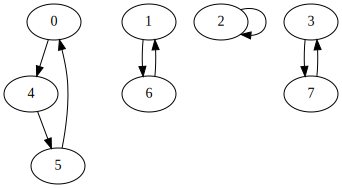

{'cycles : [(0, 4, 5), (1, 6), (3, 7)]'} {'Permutation((4, 6, 2, 7, 5, 0, 1, 3))'}


In [25]:
import random

permutation = list(range(8))
print(f"permutation before shuffling: {permutation}")
random.shuffle(permutation)
print(f" permutation after shuffling: {permutation}")

## making edges for graphviz. Node labels must be strings
edges = [(str(head), str(tail)) for head, tail in enumerate(permutation)]
G = graphviz.Digraph()
G.edges(edges)

display(G)

pi = Permutation(permutation)
print({str(pi)}, {repr(pi)})

In [26]:
print(G.pipe(format='dot').decode('utf8'))

digraph {
	graph [bb="0,0,334,180"];
	node [label="\N"];
	0	 [height=0.5,
		pos="50,162",
		width=0.75];
	4	 [height=0.5,
		pos="27,90",
		width=0.75];
	0 -> 4	 [pos="e,32.7,107.84 44.315,144.2 41.744,136.15 38.647,126.46 35.787,117.51"];
	5	 [height=0.5,
		pos="54,18",
		width=0.75];
	4 -> 5	 [pos="e,47.403,35.593 33.674,72.202 36.748,64.006 40.462,54.102 43.87,45.015"];
	1	 [height=0.5,
		pos="145,162",
		width=0.75];
	6	 [height=0.5,
		pos="145,90",
		width=0.75];
	1 -> 6	 [pos="e,139.1,107.59 139.08,144.2 138.28,136.18 138.06,126.52 138.42,117.6"];
	6 -> 1	 [pos="e,150.92,144.2 150.9,107.59 151.71,115.59 151.94,125.24 151.59,134.18"];
	2	 [height=0.5,
		pos="217,162",
		width=0.75];
	2 -> 2	 [pos="e,236.9,149.57 236.9,174.43 249.69,177.68 262,173.53 262,162 262,153.62 255.5,149.14 247.04,148.56"];
	3	 [height=0.5,
		pos="307,162",
		width=0.75];
	7	 [height=0.5,
		pos="307,90",
		width=0.75];
	3 -> 7	 [pos="e,301.1,107.59 301.08,144.2 300.28,136.18 300.06,126.52 300.42,117.6"];
	7 

# Dekorátorok

## Property

Előadáson a `property` dekorátor szerepelt.

In [18]:
class Temperature:
    def __init__(self, celsius=0):
        ## Valójában a self.T attributomot állítja be ellenőrzés mellett!
        self.C = celsius

    @property
    def F(self):
        return 32+9*self.T/5
    
    @F.setter
    def F(self, fahrenheit):
        self.C = (fahrenheit-32)*5/9

    @property
    def C(self):
        return self.T 
    
    @C.setter
    def C(self, celsius):
        if celsius < -273:
            raise ValueError('Temperature is too small')
        self.T = celsius

    def __str__(self):
        return f"{self.C:.1f} \u2103 ({self.F:.1f} \u2109)"

    def __repr__(self):
        return f"{type(self).__name__}({self.C})"
    
    

Példák.

In [19]:
temp = Temperature()

for t in range(-20, 45, 5):
    temp.C = t
    print(str(temp))
     

-20.0 ℃ (-4.0 ℉)
-15.0 ℃ (5.0 ℉)
-10.0 ℃ (14.0 ℉)
-5.0 ℃ (23.0 ℉)
0.0 ℃ (32.0 ℉)
5.0 ℃ (41.0 ℉)
10.0 ℃ (50.0 ℉)
15.0 ℃ (59.0 ℉)
20.0 ℃ (68.0 ℉)
25.0 ℃ (77.0 ℉)
30.0 ℃ (86.0 ℉)
35.0 ℃ (95.0 ℉)
40.0 ℃ (104.0 ℉)


In [20]:
temp.F = 100
print(temp)
temp

37.8 ℃ (100.0 ℉)


Temperature(37.77777777777778)